In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import mpld3
import statsmodels.api as sm
import itertools
from fbprophet import Prophet
from station import Station
from sklearn.metrics import mean_squared_error

In [2]:
# read in data files
ride_df = pd.read_csv('data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')
map_df = pd.read_csv('data/CTA_-_System_Information_-_List_of__L__Stops.csv')
station_map_names = {'Lake':'Lake/State', 'Jackson':'Jackson/State',
                     'Washington':'Washington/Dearborn'}
map_df.replace({"STATION_NAME": station_map_names}, inplace=True)

In [3]:
morse = Station('Morse', ride_df, map_df)

In [6]:
# decomposition = sm.tsa.seasonal_decompose(morse.prophet_df, model='additive')
# fig = decomposition.plot()
# plt.show()

In [14]:
df = morse.prophet_df

In [63]:
years_in_future_5=365*5+1
years_in_future_5

1826

In [17]:
date_cutoff = '01-01-2018'
train = df[df['ds']<date_cutoff]
test = df[df['ds']>=date_cutoff]

In [67]:
df.iloc[-1].ds

Timestamp('2018-06-30 00:00:00')

In [72]:
final_real_date = df.iloc[-1].ds

In [73]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=years_in_future_5)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [74]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2001-01-01,3256.158458,2634.896863,3861.417186
1,2001-01-02,3534.429551,2883.519090,4143.369255
2,2001-01-03,3602.667791,2996.766664,4194.843118
3,2001-01-04,3650.396579,3001.451388,4257.600712
4,2001-01-05,3782.816724,3119.319060,4428.360159
5,2001-01-06,2634.008489,1969.474861,3277.786977
6,2001-01-07,1977.288657,1394.709988,2653.961330
7,2001-01-08,3545.006767,2967.394788,4189.189198
8,2001-01-09,3859.941216,3265.709759,4471.967225
9,2001-01-10,3958.935807,3366.675081,4559.310288


In [85]:
forecast_data = forecast[forecast['ds']>final_real_date][['ds', 'yhat']].reset_index(
    drop=True)


,ds,yhat
0,2018-07-01,2582.294976
1,2018-07-02,4075.021237
2,2018-07-03,4314.022250
3,2018-07-04,4337.265005
4,2018-07-05,4334.871559
5,2018-07-06,4412.719520
6,2018-07-07,3205.631217
7,2018-07-08,2487.716700
8,2018-07-09,3992.155011
9,2018-07-10,4242.574759


In [55]:
forecast['y']=df['y']
forecast['residuals']=forecast['y']-forecast['yhat']

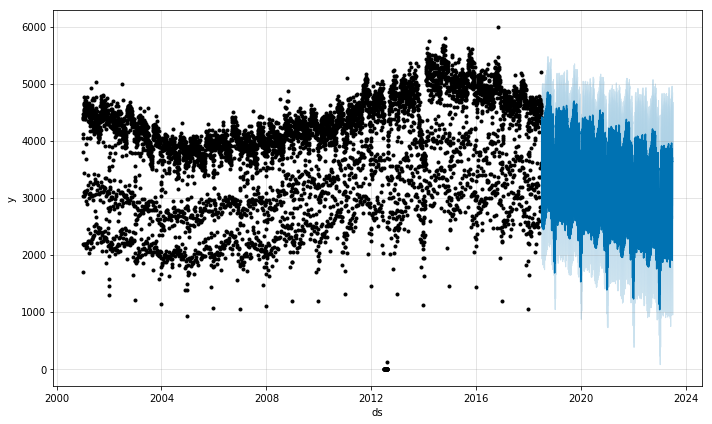

In [81]:
fig1 = m.plot(forecast_data)

In [57]:
later_years = forecast[forecast['ds']>date_cutoff]

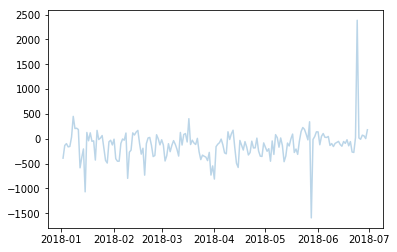

In [58]:
fig, ax = plt.subplots()
ax.plot(later_years['ds'], later_years['residuals'], alpha=.3)

In [61]:
mse = mean_squared_error(later_years['y'], later_years['yhat'])

111550.96330141339

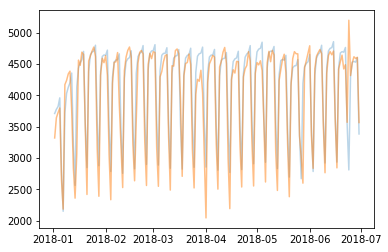

In [47]:
fig, ax = plt.subplots()

ax.plot(later_years['ds'], later_years['yhat'], alpha=.3)
ax.plot(later_years['ds'], later_years['y'], alpha=.5)


In [ ]:
# plot ridership over time
def make_time_plot(df, station):    
    d = df[df['stationname']==station]
    x = 'datetime'
    y = 'rides'
    a=d[x]
    b=d[y]
    fig, ax = plt.subplots()
    ax.plot(a, b)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.title(station)

In [ ]:
def make_layered_hist(array, station, variablename, variablelist):
    fig, ax = plt.subplots()
    for var in variablelist:
        condarray = array[(array['stationname']==station) & (array[variablename]==var)]
        dist=sns.distplot(condarray['rides'], ax=ax, label=var)
        ax.legend()
        ax.set_xlabel('# of Rides Daily', fontsize=16)
    dist=dist.get_figure()
    ax.set_ylabel('Frequency', fontsize=16)
    ax.set_xlim([0,25000])
    plt.title('Distribution of ' + station +' Rides', fontsize=20)
    return fig, ax
#     kde.savefig('figs/react_kde' + condDay + '.png')
#     plt.clf()